In [1]:
import utility
import numpy as np
import os
import natsort
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
path_dir = './data/circle/'
file_list = os.listdir(path_dir)
npz_list = []
for file_path in file_list:
    if os.path.splitext(file_path)[1] == '.npz':
        npz_list.append(file_path)
npz_list = natsort.natsorted(npz_list)
#print(npz_list)
i_list=[] # intrinsic matrix list
e_list=[] # extrinsic matrix list
d_list=[] # depth map list

for npz in npz_list:
    
    i, e, d = utility.npz_data(path_dir+npz)
    i_list.append(i)
    #e[:,3]=(e[:,3]/1000).T
    e_list.append(e)
    d_list.append(d)
    
print('Length of Depth :', len(i_list))


['0001.npz', '0002.npz', '0003.npz', '0004.npz', '0005.npz', '0006.npz', '0007.npz', '0008.npz', '0009.npz', '0010.npz', '0011.npz', '0012.npz', '0013.npz', '0014.npz', '0015.npz', '0016.npz', '0017.npz', '0018.npz', '0019.npz', '0020.npz', '0021.npz', '0022.npz', '0023.npz', '0024.npz', '0025.npz', '0026.npz', '0027.npz', '0028.npz', '0029.npz', '0030.npz', '0031.npz', '0032.npz', '0033.npz', '0034.npz', '0035.npz', '0036.npz', '0037.npz', '0038.npz', '0039.npz', '0040.npz', '0041.npz', '0042.npz', '0043.npz', '0044.npz', '0045.npz', '0046.npz', '0047.npz', '0048.npz', '0049.npz', '0050.npz', '0051.npz', '0052.npz', '0053.npz', '0054.npz', '0055.npz', '0056.npz', '0057.npz', '0058.npz', '0059.npz', '0060.npz', '0061.npz', '0062.npz', '0063.npz', '0064.npz', '0065.npz', '0066.npz', '0067.npz', '0068.npz', '0069.npz', '0070.npz', '0071.npz', '0072.npz', '0073.npz', '0074.npz', '0075.npz', '0076.npz', '0077.npz', '0078.npz', '0079.npz', '0080.npz', '0081.npz', '0082.npz', '0083.npz', '00

In [149]:
position = []
orientation = []
for i in e_list:
    r = i[:,:3]
    t = i[:,3:]
    c = -np.dot(r.T, t)
    d = np.dot(r.T, np.array([0,0,1]))
    position.append(c.T)
    orientation.append(d.T)
positions = np.vstack(position)
orientations = np.vstack(orientation)

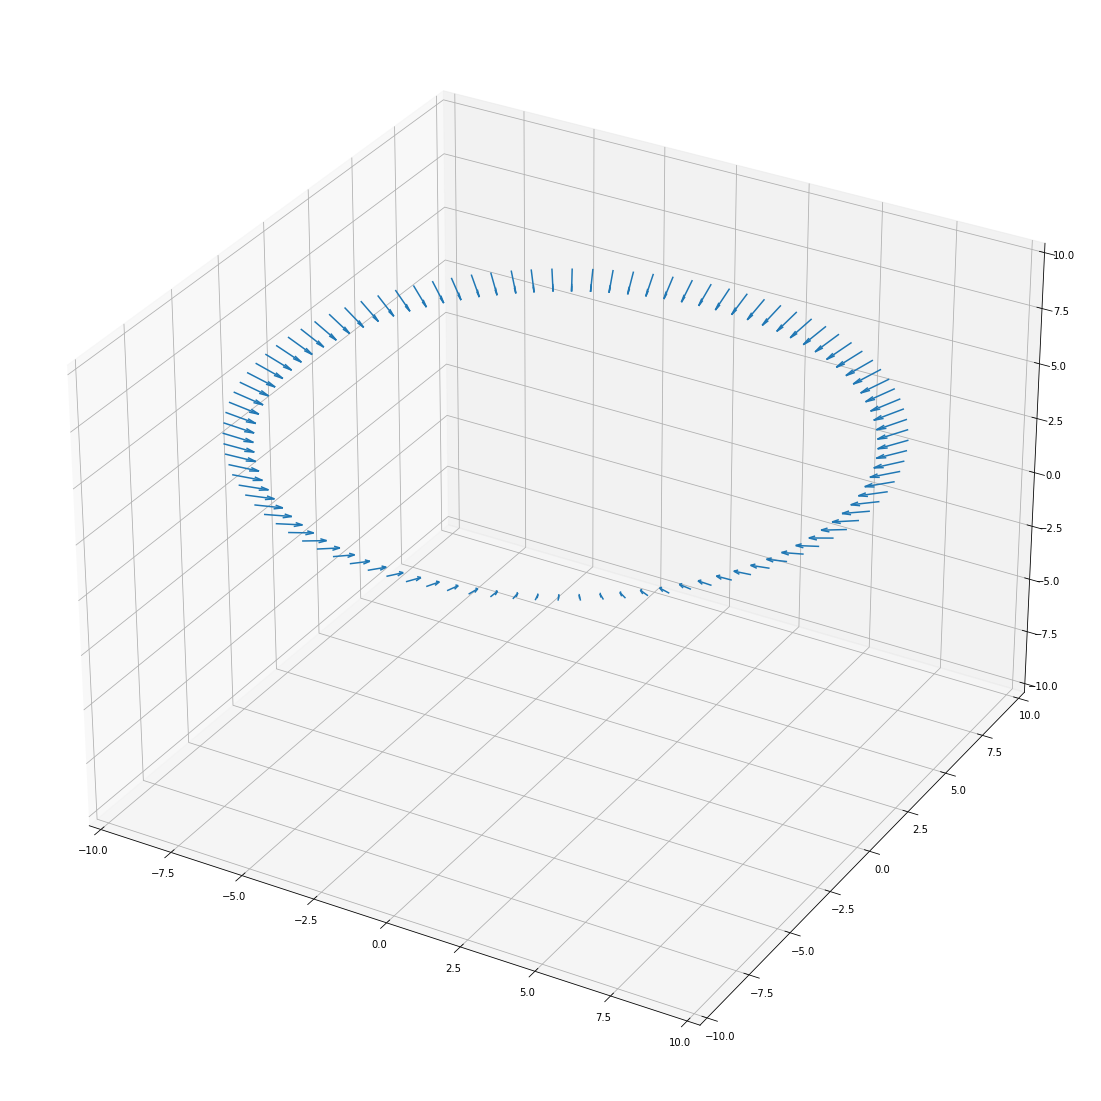

In [152]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.quiver(positions[:,0], positions[:,1], positions[:,2], orientations[:,0], orientations[:,1], orientations[:,2], length=1, normalize=True)
plt.show()